# July 21, 2019 3min ANN basic
* name: Jikhan Jeong
* reference: https://github.com/jskDr/keraspp

In [1]:
from keras import layers, models

Using TensorFlow backend.


# DIstributed Style Coding for ANN

In [6]:
def ANN_models_func(Nin, Nh, Nout):
    x = layers.Input(shape(Nin,))
    h = layers.Activation('relu')(layers.Dense(Nh)(x))
    y = layaers.Activation('softmax')(layers.Dense(Nout)(x))
    model = models.Model(x, y)
    model.comfile(loss='categorical_crossentropy', opttimizer='adam', metrics=['accuracy'])
    return model

# Seq Style Coding for ANN

In [5]:
def ANN_seq_func(Nin, Nh, Nout):
    model = models.Sequential()
    model.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
    model.add(layers.Dense(Nout, activation ='softmax'))
    model.comfile(loss='categorical_crossentropy', opttimizer='adam', metrics=['accuracy'])
    return model

# Objective Distributed Style Coding for ANN

In [8]:
class ANN_models_class(models.Model): # from model.Model, bring some method = parament class
    def __init__(self, Nin, Nh, Nout):
        
        # network layers and activation function
        
        hidden = layers.Dense(Nh)
        output = lyaers.Dense(Nout)
        relu = layers.Activation('relu')
        softmax = layers.Activation('softmax')
        
        # connect network elements
        
        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x))
        y = softmax(output(h))
        
        super().__init__(x,y) # initialization of parament class = models.Model
        self.compile(loss='categorical_crossentropy', optimizer ='adam', metrics=['accuracy'])

# Objective Seq Style Coding for ANN

In [20]:
class ANN_seq_class(models.Sequential):
    def __init__(self, Nin, Nh, Nout):
        super().__init__()
        self.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
        self.add(layers.Dense(Nout, activation ='softmax'))
        self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Data 

In [10]:
import numpy as np
from keras import datasets
from keras.utils import np_utils # to catogorical

In [25]:
def Data_func():
    (X_train, y_train),(X_test, y_test) = datasets.mnist.load_data()
    
    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test) 
    
    L, W, H = X_train.shape
    X_train = X_train.reshape(-1, W*H)
    X_test  = X_test.reshape(-1, W*H)
    
    X_train = X_train/ 255.0
    X_test  = X_test/255.0
    
    return (X_train, Y_train), (X_test, Y_test)

# Graph

In [12]:
import matplotlib.pyplot as plt

In [13]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','Test'], loc=0)

In [14]:
def plot_acc(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Test'], loc=0)

# Main file

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 3s 64us/step - loss: 0.4026 - acc: 0.8880 - val_loss: 0.2192 - val_acc: 0.9394
Epoch 2/10
48000/48000 [==============================] - 2s 39us/step - loss: 0.1913 - acc: 0.9441 - val_loss: 0.1576 - val_acc: 0.9576
Epoch 3/10
48000/48000 [==============================] - 2s 39us/step - loss: 0.1369 - acc: 0.9615 - val_loss: 0.1297 - val_acc: 0.9641
Epoch 4/10
48000/48000 [==============================] - 2s 39us/step - loss: 0.1060 - acc: 0.9702 - val_loss: 0.1150 - val_acc: 0.9676
Epoch 5/10
48000/48000 [==============================] - 2s 39us/step - loss: 0.0863 - acc: 0.9755 - val_loss: 0.1038 - val_acc: 0.9698
Epoch 6/10
48000/48000 [==============================] - 2s 39us/step - loss: 0.0716 - acc: 0.9797 - val_loss: 0.0984 - val_acc: 0.9714
Epoch 7/10
48000/48000 [==============================] - 2s 39us/step - loss: 0.0596 - acc: 0.9829 - val_loss: 0.0956 - val_acc

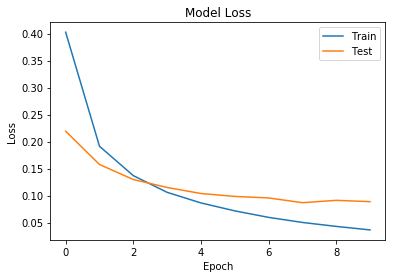

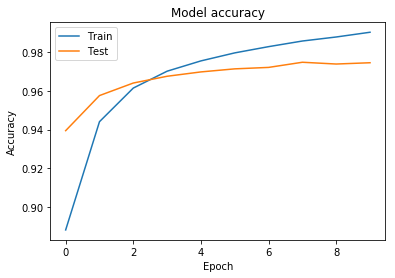

In [27]:
def main():
    Nin = 784
    Nh = 100
    number_of_class = 10
    Nout = number_of_class
    
    model = ANN_seq_class(Nin, Nh, Nout)
    (X_train, Y_train), (X_test, Y_test) = Data_func()
    
    
    history = model.fit(X_train, Y_train, epochs=10, batch_size=100, validation_split=0.2)
    performance_test = model.evaluate(X_test, Y_test, batch_size=100)
    print('Test Loss and Accurach ->', performance_test)
    
    plot_loss(history)
    plt.show()
    plot_acc(history)
    plt.show()
    
if __name__ == '__main__':
    main()